In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import fetch_california_housing


In [6]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [12]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame  # pandas DataFrame
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [15]:
df.value

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
15.0001  47.0      8.592308   1.061538   749.0       2.880769  34.13     -118.10    5.00001        1
         46.0      9.203947   0.973684   410.0       2.697368  34.08     -118.42    5.00001        1
                   8.365591   0.967742   238.0       2.559140  34.08     -118.43    5.00001        1
                   6.000000   0.800000   13.0        2.600000  37.50     -122.14    5.00001        1
         45.0      10.370656  1.092664   857.0       3.308880  34.09     -118.40    5.00001        1
                                                                                                  ..
0.4999   28.0      7.677419   1.870968   142.0       4.580645  34.15     -118.08    5.00001        1
         23.0      6.054545   1.672727   198.0       3.600000  36.09     -119.99    1.00000        1
         16.0      21.631579  6.000000   26.0        1.368421  39.42     -122.89    0.73500        1
         15.0      11.596491  2.561404   131.0       2.298246  40.43     -123.32    0.56700        1
         10.0      6.740000   2.040000   108.0       2.160000  34.69     -116.90    0.55000        1
Name: count, Length: 20640, dtype: int64

In [18]:
df['MedHouseVal'].value_counts()

,count
MedHouseVal,
5.00001,965
1.37500,122
1.62500,117
1.12500,103
1.87500,93
...,...
0.34200,1
0.46200,1
3.52000,1


In [20]:
df.shape

(20640, 9)

In [21]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [22]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [23]:
correlation=df.corr()

<Axes: >

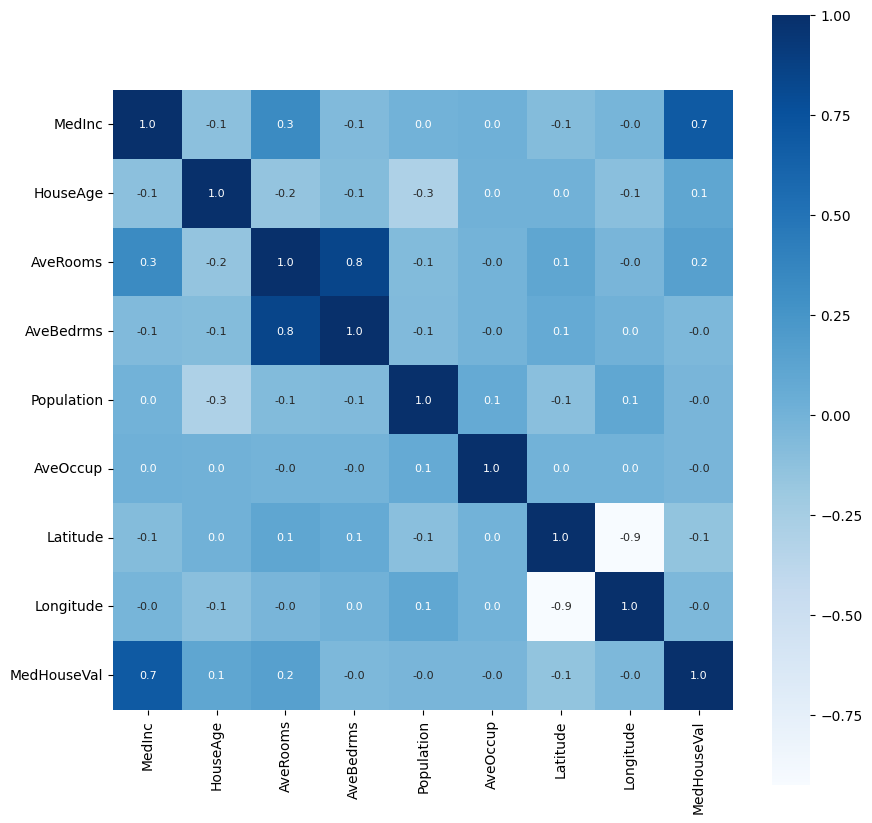

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [30]:
X=df.drop(['MedHouseVal'],axis=1)
Y=df['MedHouseVal']

In [31]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [34]:
model=XGBRegressor()

In [36]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
training_data_prediction=model.predict(X_train)

In [39]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [40]:
score_1=metrics.r2_score(Y_train,training_data_prediction)

In [41]:
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)


In [42]:
print('R squared error : ',score_1)
print('Mean absolute error : ',score_2)

R squared error :  0.943650140819218
Mean absolute error :  0.1933648700612105


In [43]:
test_data_prediction=model.predict(X_test)

In [44]:
print(test_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [45]:
score1=metrics.r2_score(Y_test,test_data_prediction)
score2=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [46]:
print('R squared error : ',score1)
print('Mean absolute error : ',score2)

R squared error :  0.8338000331788725
Mean absolute error :  0.3108631800268186


<function matplotlib.pyplot.show(close=None, block=None)>

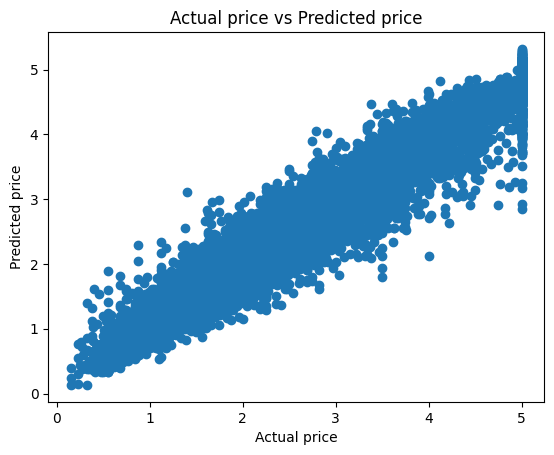

In [47]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show

In [49]:
import numpy as np

# Example feature values (replace these with real data)
new_house = np.array([[8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23]])

# Predict using your trained model
predicted_value = model.predict(new_house)

print("Predicted Median House Value (in $100,000s):", predicted_value[0])
print("≈", predicted_value[0] * 100000, "USD")


Predicted Median House Value (in $100,000s): 4.3000865
≈ 430008.66 USD
